In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, make_scorer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier

# 3.1. Explorarea Datelor Secvențiale

## Patients data set

In [ ]:
patients = pd.read_csv("/content/drive/MyDrive/datasets/patients.csv")

In [ ]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1912 non-null   int64  
 1   Transportation                1912 non-null   int64  
 2   Regular_fiber_diet            1912 non-null   float64
 3   Diagnostic_in_family_history  1912 non-null   int64  
 4   High_calorie_diet             1912 non-null   int64  
 5   Sedentary_hours_daily         1912 non-null   float64
 6   Age                           1912 non-null   float64
 7   Alcohol                       1912 non-null   int64  
 8   Est_avg_calorie_intake        1912 non-null   int64  
 9   Main_meals_daily              1912 non-null   float64
 10  Snacks                        1912 non-null   int64  
 11  Height                        1912 non-null   float64
 12  Smoker                        1912 non-null   int64  
 13  Wat

In [ ]:
X = patients.drop('Diagnostic', axis=1)
y = patients['Diagnostic']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Arhitectura de tip MLP

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=10000, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 1.95974978
Iteration 2, loss = 1.95542300
Iteration 3, loss = 1.94948214
Iteration 4, loss = 1.94381083
Iteration 5, loss = 1.93808637
Iteration 6, loss = 1.93284712
Iteration 7, loss = 1.92821552
Iteration 8, loss = 1.92406939
Iteration 9, loss = 1.92009332
Iteration 10, loss = 1.91617794
Iteration 11, loss = 1.91255393
Iteration 12, loss = 1.90888055
Iteration 13, loss = 1.90529899
Iteration 14, loss = 1.90183100
Iteration 15, loss = 1.89841923
Iteration 16, loss = 1.89493393
Iteration 17, loss = 1.89158344
Iteration 18, loss = 1.88794959
Iteration 19, loss = 1.88445466
Iteration 20, loss = 1.88093364
Iteration 21, loss = 1.87710999
Iteration 22, loss = 1.87339725
Iteration 23, loss = 1.86964842
Iteration 24, loss = 1.86590186
Iteration 25, loss = 1.86217488
Iteration 26, loss = 1.85841507
Iteration 27, loss = 1.85466471
Iteration 28, loss = 1.85080848
Iteration 29, loss = 1.84693862
Iteration 30, loss = 1.84302262
Iteration 31, loss = 1.83899006
Iteration 32, los

In [ ]:
accuracy_score(y_test, y_pred)

0.8641114982578397

In [ ]:
# Calcularea acurateței generale de clasificare
accuracy = accuracy_score(y_test, y_pred)
print(f"General Accuracy: {accuracy:.2f}")

# Calcularea preciziei, recall-ului și F1-score-ului pentru fiecare clasă
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

General Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        74
           1       0.77      0.72      0.75        79
           2       0.79      0.79      0.79        77
           3       0.77      0.81      0.79        80
           4       0.88      0.84      0.86        95
           5       0.92      0.97      0.95        80
           6       0.99      0.99      0.99        89

    accuracy                           0.86       574
   macro avg       0.86      0.86      0.86       574
weighted avg       0.86      0.86      0.86       574



## Ptbdb data set

### Data processing

In [ ]:
normal_df = pd.read_csv("/content/drive/MyDrive/datasets/ptbdb_normal.csv",header=None)
abnormal_df = pd.read_csv("/content/drive/MyDrive/datasets/ptbdb_abnormal.csv",header=None)

In [ ]:
len(normal_df)

4046

In [ ]:
len(abnormal_df)

10506

In [ ]:
ptb=pd.concat([normal_df,abnormal_df])
ptb=ptb.reset_index(drop=True)
ptb

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
ptb.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [ ]:
X = ptb.iloc[:,:186]
y = ptb.iloc[:,-1]

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# rezolva valori lipsa
X = X.replace(0, np.nan).astype(float)
imputer = SimpleImputer(missing_values=pd.NA, strategy='mean')
X = imputer.fit_transform(X)

In [ ]:
X = pd.DataFrame(X)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
1,1.000000,0.794681,0.375387,0.116883,0.225067,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
2,0.909029,0.791482,0.423169,0.186712,0.225067,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
12288,1.000000,0.768963,0.382046,0.094642,0.043841,0.033403,0.151009,0.338205,0.409186,0.454419,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
14175,1.000000,0.627267,0.234055,0.108836,0.084845,0.128145,0.185489,0.210650,0.205968,0.220012,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
11818,0.994601,0.651470,0.269346,0.360528,0.515297,0.408518,0.324535,0.256149,0.247750,0.274745,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
1352,1.000000,0.653775,0.391805,0.191529,0.157228,0.186464,0.188536,0.184853,0.183011,0.183011,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
6406,1.000000,0.604844,0.029758,0.272268,0.139792,0.442215,0.485121,0.550173,0.601384,0.611073,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13626,0.901305,1.000000,0.382953,0.080750,0.006525,0.020392,0.036705,0.057912,0.073409,0.059951,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
5155,0.900385,0.544273,0.115014,0.272268,0.113090,0.083734,0.090472,0.107315,0.095284,0.125602,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
11341,0.937063,0.944056,0.925075,0.900100,0.817183,0.737263,0.653347,0.590410,0.562438,0.538462,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709
13730,1.000000,0.169545,0.007849,0.272268,0.124019,0.139717,0.164835,0.165620,0.160911,0.182104,...,0.223548,0.209487,0.22192,0.225873,0.201465,0.192088,0.204564,0.215944,0.183781,0.192709


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

### Analiza echilibrului de clase

In [ ]:
y_train_df = pd.DataFrame({'Label': y_train})
y_test_df = pd.DataFrame({'Label': y_test})

<ipython-input-17-f50d143a3768>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=y_train_df, palette='Set2')


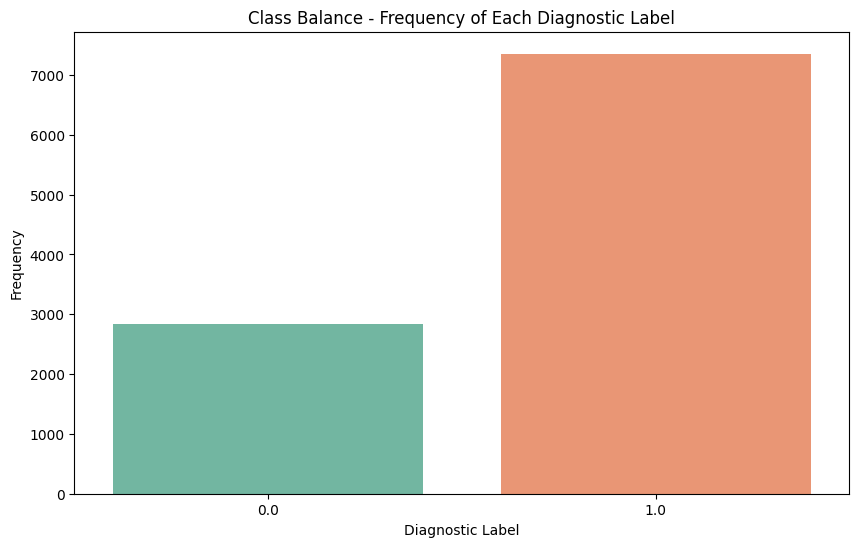

In [ ]:
# train
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=y_train_df, palette='Set2')
plt.title('Class Balance - Frequency of Each Diagnostic Label')
plt.xlabel('Diagnostic Label')
plt.ylabel('Frequency')
plt.show()

<ipython-input-18-0db0294ca283>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=y_test_df, palette='Set2')


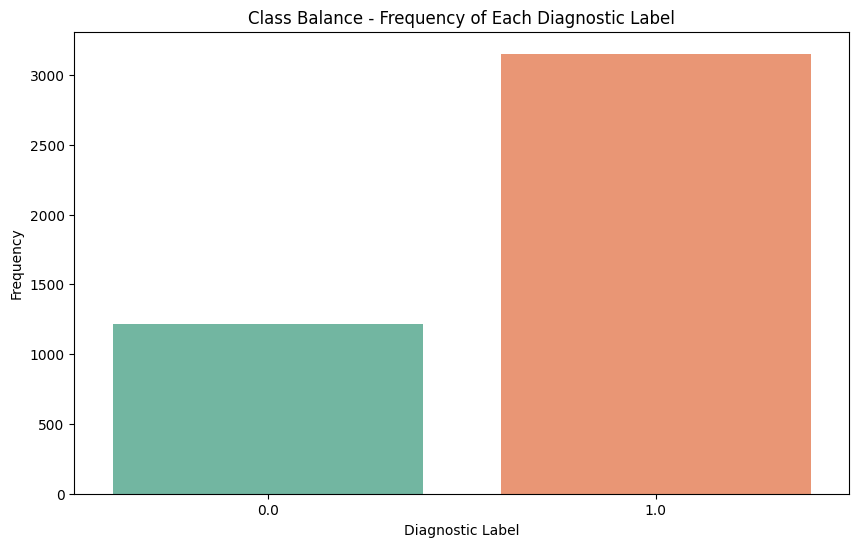

In [ ]:
# test
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=y_test_df, palette='Set2')
plt.title('Class Balance - Frequency of Each Diagnostic Label')
plt.xlabel('Diagnostic Label')
plt.ylabel('Frequency')
plt.show()

### Arhitectura de tip MLP


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 0.58432278
Iteration 2, loss = 0.57026478
Iteration 3, loss = 0.56339426
Iteration 4, loss = 0.55656821
Iteration 5, loss = 0.54965806
Iteration 6, loss = 0.54244489
Iteration 7, loss = 0.53500440
Iteration 8, loss = 0.52729763
Iteration 9, loss = 0.51938859
Iteration 10, loss = 0.51121904
Iteration 11, loss = 0.50290534
Iteration 12, loss = 0.49452310
Iteration 13, loss = 0.48588321
Iteration 14, loss = 0.47749791
Iteration 15, loss = 0.46942827
Iteration 16, loss = 0.46188647
Iteration 17, loss = 0.45475996
Iteration 18, loss = 0.44820117
Iteration 19, loss = 0.44225458
Iteration 20, loss = 0.43691851
Iteration 21, loss = 0.43234970
Iteration 22, loss = 0.42786772
Iteration 23, loss = 0.42403179
Iteration 24, loss = 0.42052487
Iteration 25, loss = 0.41736096
Iteration 26, loss = 0.41503587
Iteration 27, loss = 0.41188854
Iteration 28, loss = 0.40967401
Iteration 29, loss = 0.40741892
Iteration 30, loss = 0.40529392
Iteration 31, loss = 0.40353457
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Calcularea acurateței generale de clasificare
accuracy = accuracy_score(y_test, y_pred)
print(f"General Accuracy: {accuracy:.2f}")

# Calcularea preciziei, recall-ului și F1-score-ului pentru fiecare clasă
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

General Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.75      0.84      1214
         1.0       0.91      0.99      0.95      3152

    accuracy                           0.92      4366
   macro avg       0.93      0.87      0.89      4366
weighted avg       0.92      0.92      0.92      4366



### Arhitectură de tip convoluțională

In [ ]:
import tensorflow
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization,MultiHeadAttention,GlobalAveragePooling1D,LayerNormalization,Input
from keras.models import Sequential
from keras.metrics import Precision, Recall, Accuracy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [ ]:
X_train = X_train.values.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.values.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
X_train.shape

(10186, 186, 1)

#### Adam, lr = 0.01

In [ ]:
cnn_adam = Sequential([
    Conv1D(64, 3, input_shape=(X_train.shape[1], 1), activation='relu'),
    Dense(64, activation='relu'),
    Conv1D(64, 3, activation='relu'),
    Dense(64, activation='relu'),
    Conv1D(32, 2, activation='relu'),
    Dense(32, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

adam_optimizer = Adam(learning_rate=0.01)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
cnn_adam.compile(loss="binary_crossentropy",optimizer=adam_optimizer,metrics=['accuracy',Precision(),Recall()])
history1 = cnn_adam.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
255/255 [==============================] - 6s 14ms/step - loss: 0.6009 - accuracy: 0.7188 - precision_5: 0.7197 - recall_5: 0.9978 - val_loss: 0.5823 - val_accuracy: 0.7316 - val_precision_5: 0.7316 - val_recall_5: 1.0000
Epoch 2/20
255/255 [==============================] - 3s 11ms/step - loss: 0.5965 - accuracy: 0.7196 - precision_5: 0.7196 - recall_5: 1.0000 - val_loss: 0.5844 - val_accuracy: 0.7316 - val_precision_5: 0.7316 - val_recall_5: 1.0000
Epoch 3/20
255/255 [==============================] - 2s 9ms/step - loss: 0.5946 - accuracy: 0.7196 - precision_5: 0.7196 - recall_5: 1.0000 - val_loss: 0.5825 - val_accuracy: 0.7316 - val_precision_5: 0.7316 - val_recall_5: 1.0000
Epoch 4/20
255/255 [==============================] - 2s 9ms/step - loss: 0.5940 - accuracy: 0.7196 - precision_5: 0.7196 - recall_5: 1.0000 - val_loss: 0.5828 - val_accuracy: 0.7316 - val_precision_5: 0.7316 - val_recall_5: 1.0000


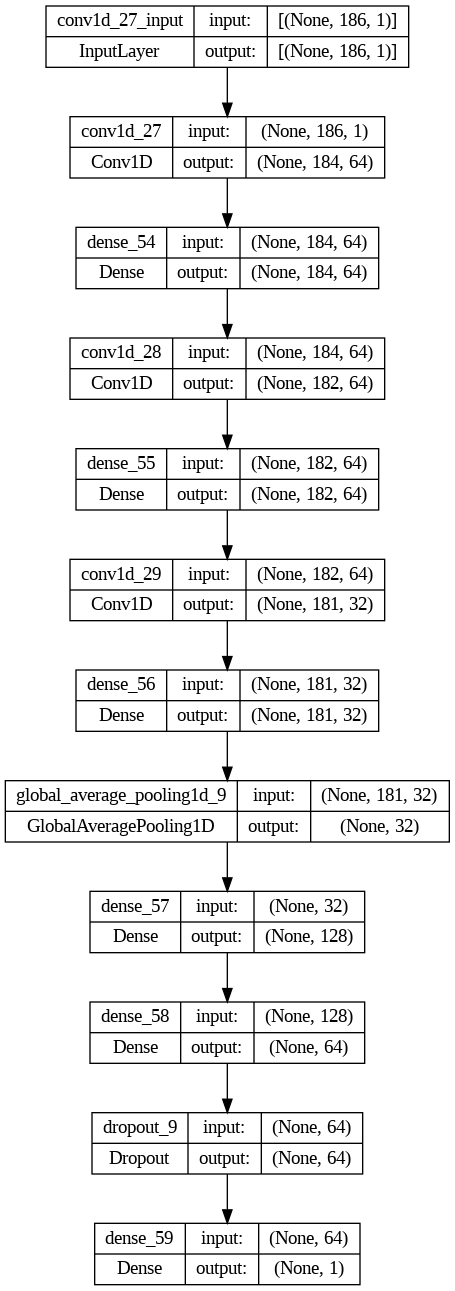

In [ ]:
tensorflow.keras.utils.plot_model(cnn_adam, "my_model.png", show_shapes=True)

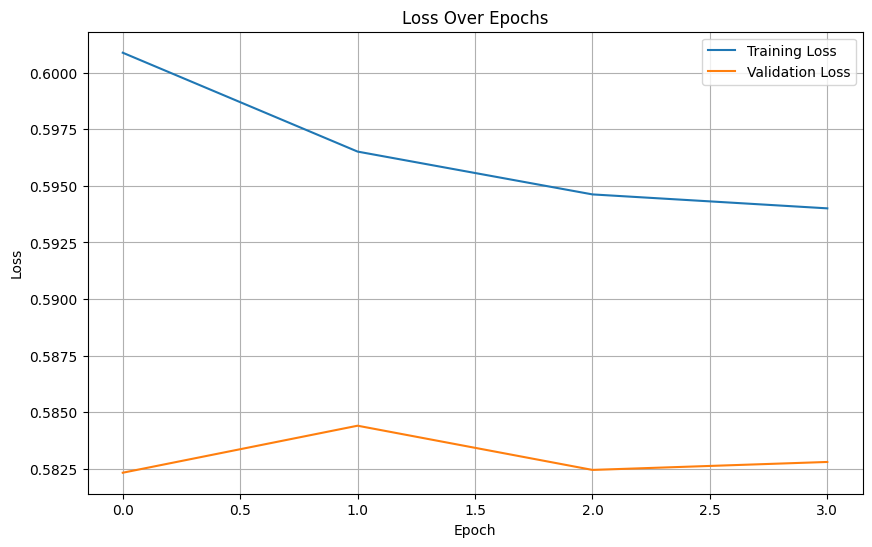

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
pred= cnn_adam.predict(X_test)
yhat = pred>=.5
yhat = yhat.astype(int)
print(classification_report(y_test.values,yhat))

137/137 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1214
         1.0       0.72      1.00      0.84      3152

    accuracy                           0.72      4366
   macro avg       0.36      0.50      0.42      4366
weighted avg       0.52      0.72      0.61      4366



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Adam, lr = 0.001

In [ ]:
cnn_adam = Sequential([
    Conv1D(64, 3, input_shape=(X_train.shape[1], 1), activation='relu'),
    Dense(64, activation='relu'),
    Conv1D(64, 3, activation='relu'),
    Dense(64, activation='relu'),
    Conv1D(32, 2, activation='relu'),
    Dense(32, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

adam_optimizer = Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
cnn_adam.compile(loss="binary_crossentropy",optimizer=adam_optimizer,metrics=['accuracy',Precision(),Recall()])
history2 = cnn_adam.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
255/255 [==============================] - 5s 10ms/step - loss: 0.5828 - accuracy: 0.7187 - precision_6: 0.7196 - recall_6: 0.9978 - val_loss: 0.5558 - val_accuracy: 0.7316 - val_precision_6: 0.7316 - val_recall_6: 1.0000
Epoch 2/20
255/255 [==============================] - 2s 9ms/step - loss: 0.5286 - accuracy: 0.7261 - precision_6: 0.7460 - recall_6: 0.9389 - val_loss: 0.5176 - val_accuracy: 0.7311 - val_precision_6: 0.7315 - val_recall_6: 0.9993
Epoch 3/20
255/255 [==============================] - 2s 9ms/step - loss: 0.4781 - accuracy: 0.7432 - precision_6: 0.7739 - recall_6: 0.9087 - val_loss: 0.5075 - val_accuracy: 0.7321 - val_precision_6: 0.7326 - val_recall_6: 0.9980
Epoch 4/20
255/255 [==============================] - 3s 12ms/step - loss: 0.4658 - accuracy: 0.7505 - precision_6: 0.7911 - recall_6: 0.8876 - val_loss: 0.4429 - val_accuracy: 0.7758 - val_precision_6: 0.7850 - val_recall_6: 0.9551
Epoch 5/20
255/255 [==============================] - 2s 9ms/step - lo

In [ ]:
# tensorflow.keras.utils.plot_model(cnn_adam, "my_model.png", show_shapes=True)

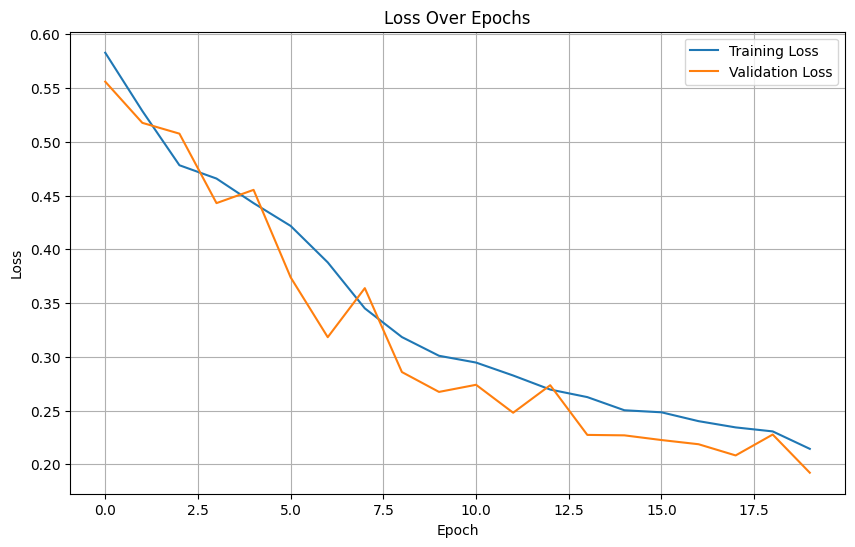

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
pred= cnn_adam.predict(X_test)
yhat = pred>=.5
yhat = yhat.astype(int)
print(classification_report(y_test.values,yhat))

137/137 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.58      0.73      1214
         1.0       0.86      0.99      0.92      3152

    accuracy                           0.88      4366
   macro avg       0.92      0.79      0.82      4366
weighted avg       0.89      0.88      0.87      4366



#### Adam, lr = 0.0001

In [ ]:
cnn_adam = Sequential([
    Conv1D(64, 3, input_shape=(X_train.shape[1], 1), activation='relu'),
    Dense(64, activation='relu'),
    Conv1D(64, 3, activation='relu'),
    Dense(64, activation='relu'),
    Conv1D(32, 2, activation='relu'),
    Dense(32, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
adam_optimizer = Adam(learning_rate=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
cnn_adam.compile(loss="binary_crossentropy",optimizer=adam_optimizer,metrics=['accuracy',Precision(),Recall()])
history3 = cnn_adam.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
255/255 [==============================] - 7s 10ms/step - loss: 0.6106 - accuracy: 0.7191 - precision_7: 0.7195 - recall_7: 0.9991 - val_loss: 0.5630 - val_accuracy: 0.7316 - val_precision_7: 0.7316 - val_recall_7: 1.0000
Epoch 2/20
255/255 [==============================] - 2s 9ms/step - loss: 0.5811 - accuracy: 0.7196 - precision_7: 0.7196 - recall_7: 1.0000 - val_loss: 0.5621 - val_accuracy: 0.7316 - val_precision_7: 0.7316 - val_recall_7: 1.0000
Epoch 3/20
255/255 [==============================] - 2s 8ms/step - loss: 0.5780 - accuracy: 0.7196 - precision_7: 0.7196 - recall_7: 1.0000 - val_loss: 0.5613 - val_accuracy: 0.7316 - val_precision_7: 0.7316 - val_recall_7: 1.0000
Epoch 4/20
255/255 [==============================] - 2s 8ms/step - loss: 0.5714 - accuracy: 0.7196 - precision_7: 0.7196 - recall_7: 1.0000 - val_loss: 0.5532 - val_accuracy: 0.7316 - val_precision_7: 0.7316 - val_recall_7: 1.0000
Epoch 5/20
255/255 [==============================] - 3s 12ms/step - lo

In [ ]:
# tensorflow.keras.utils.plot_model(cnn_adam, "my_model.png", show_shapes=True)

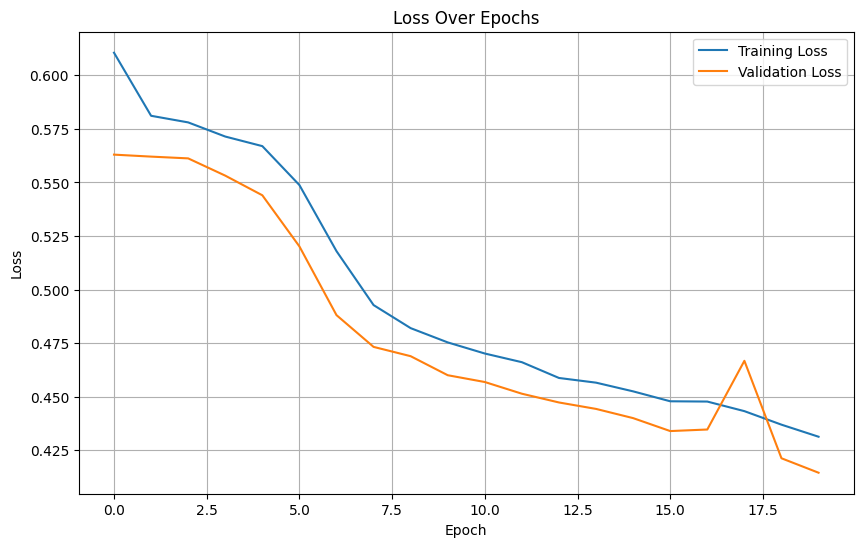

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
pred= cnn_adam.predict(X_test)
yhat = pred>=.5
yhat = yhat.astype(int)
print(classification_report(y_test.values,yhat))

137/137 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

         0.0       0.67      0.44      0.54      1214
         1.0       0.81      0.92      0.86      3152

    accuracy                           0.79      4366
   macro avg       0.74      0.68      0.70      4366
weighted avg       0.77      0.79      0.77      4366



#### Adam, lr = 0.001, epoch = 50

In [ ]:
cnn_adam = Sequential([
    Conv1D(64, 3, input_shape=(X_train.shape[1], 1), activation='relu'),
    Dense(64, activation='relu'),
    Conv1D(64, 3, activation='relu'),
    Dense(64, activation='relu'),
    Conv1D(32, 2, activation='relu'),
    Dense(32, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

adam_optimizer = Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
cnn_adam.compile(loss="binary_crossentropy",optimizer=adam_optimizer,metrics=['accuracy',Precision(),Recall()])
history2 = cnn_adam.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
255/255 [==============================] - 5s 9ms/step - loss: 0.5828 - accuracy: 0.7172 - precision_8: 0.7193 - recall_8: 0.9956 - val_loss: 0.5496 - val_accuracy: 0.7316 - val_precision_8: 0.7316 - val_recall_8: 1.0000
Epoch 2/50
255/255 [==============================] - 3s 12ms/step - loss: 0.5294 - accuracy: 0.7255 - precision_8: 0.7457 - recall_8: 0.9384 - val_loss: 0.5141 - val_accuracy: 0.7390 - val_precision_8: 0.7822 - val_recall_8: 0.8913
Epoch 3/50
255/255 [==============================] - 3s 10ms/step - loss: 0.4938 - accuracy: 0.7297 - precision_8: 0.7634 - recall_8: 0.9048 - val_loss: 0.4647 - val_accuracy: 0.7571 - val_precision_8: 0.7695 - val_recall_8: 0.9537
Epoch 4/50
255/255 [==============================] - 2s 8ms/step - loss: 0.4668 - accuracy: 0.7434 - precision_8: 0.7726 - recall_8: 0.9116 - val_loss: 0.4733 - val_accuracy: 0.7512 - val_precision_8: 0.7557 - val_recall_8: 0.9752
Epoch 5/50
255/255 [==============================] - 2s 8ms/step - lo

In [ ]:
# tensorflow.keras.utils.plot_model(cnn_adam, "my_model.png", show_shapes=True)

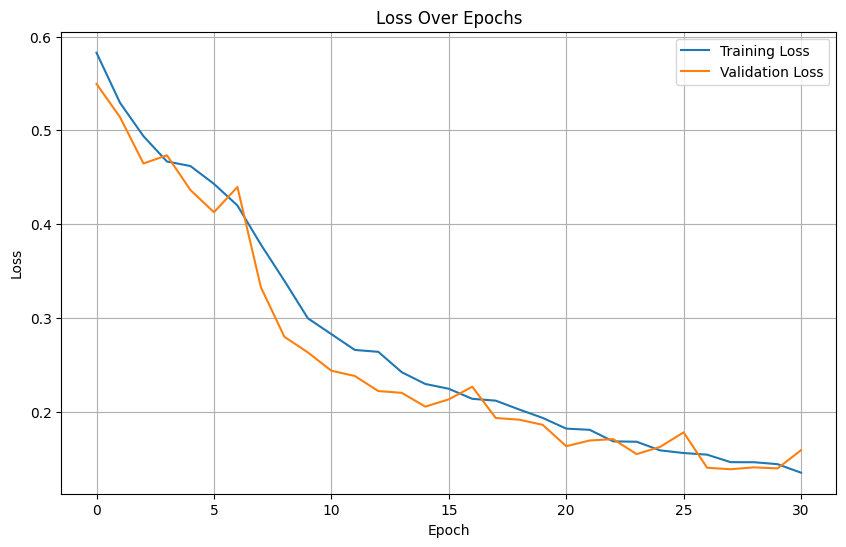

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
pred= cnn_adam.predict(X_test)
yhat = pred>=.5
yhat = yhat.astype(int)
print(classification_report(y_test.values,yhat))

137/137 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      1214
         1.0       0.95      0.97      0.96      3152

    accuracy                           0.93      4366
   macro avg       0.93      0.91      0.92      4366
weighted avg       0.93      0.93      0.93      4366



#### Adam, lr = 0.0001, epoch = 50

In [ ]:
cnn_adam = Sequential([
    Conv1D(64, 3, input_shape=(X_train.shape[1], 1), activation='relu'),
    Dense(64, activation='relu'),
    Conv1D(64, 3, activation='relu'),
    Dense(64, activation='relu'),
    Conv1D(32, 2, activation='relu'),
    Dense(32, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

adam_optimizer = Adam(learning_rate=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
cnn_adam.compile(loss="binary_crossentropy",optimizer=adam_optimizer,metrics=['accuracy',Precision(),Recall()])
history5 = cnn_adam.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
255/255 [==============================] - 5s 10ms/step - loss: 0.6118 - accuracy: 0.7171 - precision_9: 0.7193 - recall_9: 0.9954 - val_loss: 0.5658 - val_accuracy: 0.7316 - val_precision_9: 0.7316 - val_recall_9: 1.0000
Epoch 2/50
255/255 [==============================] - 2s 8ms/step - loss: 0.5808 - accuracy: 0.7196 - precision_9: 0.7196 - recall_9: 1.0000 - val_loss: 0.5612 - val_accuracy: 0.7316 - val_precision_9: 0.7316 - val_recall_9: 1.0000
Epoch 3/50
255/255 [==============================] - 2s 8ms/step - loss: 0.5764 - accuracy: 0.7196 - precision_9: 0.7196 - recall_9: 1.0000 - val_loss: 0.5572 - val_accuracy: 0.7316 - val_precision_9: 0.7316 - val_recall_9: 1.0000
Epoch 4/50
255/255 [==============================] - 3s 13ms/step - loss: 0.5708 - accuracy: 0.7196 - precision_9: 0.7196 - recall_9: 1.0000 - val_loss: 0.5500 - val_accuracy: 0.7316 - val_precision_9: 0.7316 - val_recall_9: 1.0000
Epoch 5/50
255/255 [==============================] - 2s 9ms/step - lo

In [ ]:
# tensorflow.keras.utils.plot_model(cnn_adam, "my_model.png", show_shapes=True)

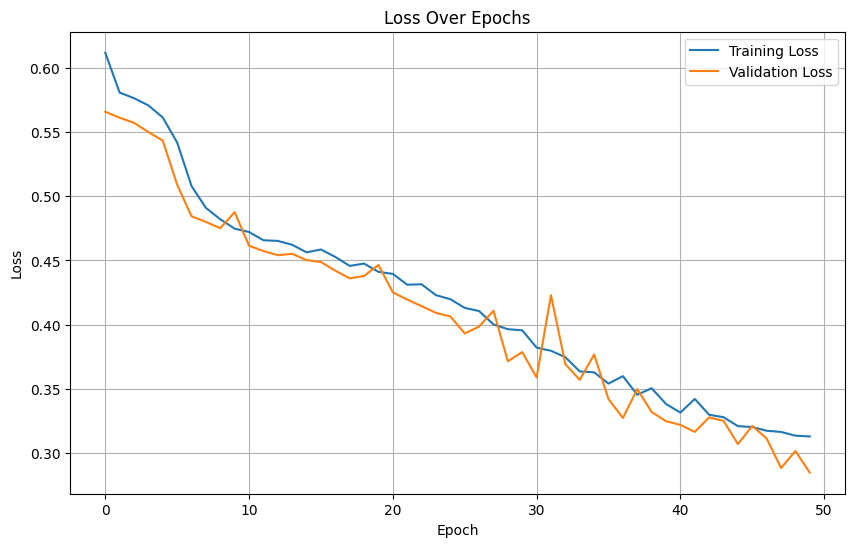

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot loss
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
pred= cnn_adam.predict(X_test)
yhat = pred>=.5
yhat = yhat.astype(int)
print(classification_report(y_test.values,yhat))

137/137 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

         0.0       0.86      0.57      0.69      1214
         1.0       0.85      0.97      0.91      3152

    accuracy                           0.86      4366
   macro avg       0.86      0.77      0.80      4366
weighted avg       0.86      0.86      0.84      4366



#### Sgd cu learning rate scheduler

In [ ]:
import math
# learning rate schedule
def lr_schedule(epoch, lr):
    """
    Returns a custom learning rate that decreases as epochs progress.
    """
    if epoch < 10:
            return lr
    else:
        return lr * math.exp(-0.1)


    tensorflow.summary.scalar('learning rate', data=learning_rate, step=epoch)
    return learning_rate


cnn_sgd = Sequential([
    Conv1D(64, 3, input_shape=(X_train.shape[1], 1), activation='relu'),
    Dense(64, activation='relu'),
    Conv1D(64, 3, activation='relu'),
    Dense(64, activation='relu'),
    Conv1D(32, 2, activation='relu'),
    Dense(32, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

sgd_optimizer = SGD(learning_rate=0.01)
cnn_sgd.compile(loss="binary_crossentropy", optimizer=sgd_optimizer, metrics=['accuracy', Precision(), Recall()])

# callbacks for SGD optimizer
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with SGD optimizer
history6 = cnn_sgd.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

Epoch 1/50
255/255 [==============================] - 4s 10ms/step - loss: 0.6316 - accuracy: 0.7176 - precision_11: 0.7191 - recall_11: 0.9971 - val_loss: 0.5932 - val_accuracy: 0.7316 - val_precision_11: 0.7316 - val_recall_11: 1.0000 - lr: 0.0100
Epoch 2/50
255/255 [==============================] - 3s 13ms/step - loss: 0.5974 - accuracy: 0.7196 - precision_11: 0.7196 - recall_11: 1.0000 - val_loss: 0.5832 - val_accuracy: 0.7316 - val_precision_11: 0.7316 - val_recall_11: 1.0000 - lr: 0.0100
Epoch 3/50
255/255 [==============================] - 2s 8ms/step - loss: 0.5948 - accuracy: 0.7196 - precision_11: 0.7196 - recall_11: 1.0000 - val_loss: 0.5814 - val_accuracy: 0.7316 - val_precision_11: 0.7316 - val_recall_11: 1.0000 - lr: 0.0100
Epoch 4/50
255/255 [==============================] - 2s 8ms/step - loss: 0.5945 - accuracy: 0.7196 - precision_11: 0.7196 - recall_11: 1.0000 - val_loss: 0.5810 - val_accuracy: 0.7316 - val_precision_11: 0.7316 - val_recall_11: 1.0000 - lr: 0.0100
Ep

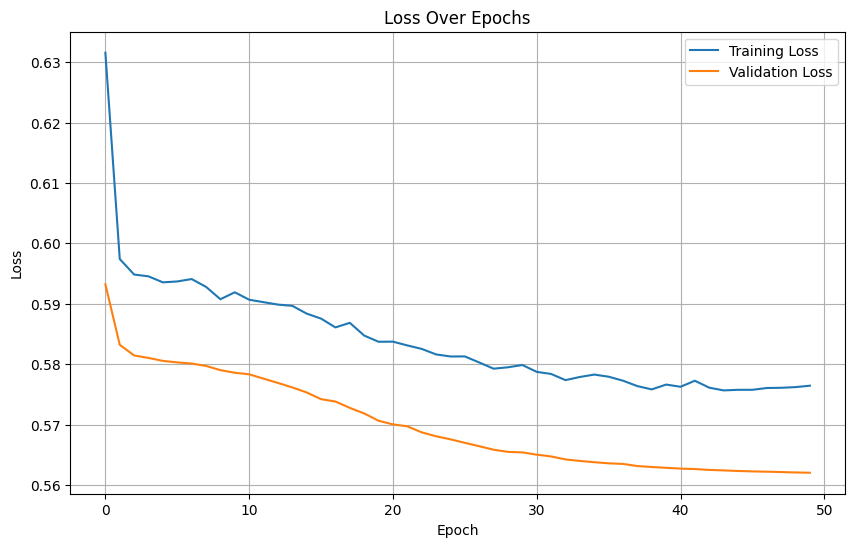

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot loss
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
pred= cnn_sgd.predict(X_test)
yhat = pred>=.5
yhat = yhat.astype(int)
print(classification_report(y_test.values,yhat))

137/137 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1214
         1.0       0.72      1.00      0.84      3152

    accuracy                           0.72      4366
   macro avg       0.36      0.50      0.42      4366
weighted avg       0.52      0.72      0.61      4366



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
